In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
import pandas as pd
import numpy as np
from cnp.experiment import WorkingDirectory, generate_root
import os
import matplotlib.pyplot as plt
import matplotlib



In [30]:
# root = '/home/ubuntu//code/kernelcnp/experiments/synthetic/results/weakly-periodic-400/models/convGNP/sum-kvv-homo/seed-0/dim-1'
os.chdir('/home/ubuntu//code/kernelcnp/experiments/synthetic/results/weakly-periodic-400/models/convGNP/sum-kvv-homo/seed-0/dim-1')

In [15]:
basis = ["2", '8', "64", "128", "512", "4096"]
colours = ["tab:blue", "tab:orange", "tab:purple", "tab:olive", "tab:red", "tab:green"]
markers = ["o", "x", "s", "v", "D", "*"]
sums = ["1", "2", "8", "16", "64"]


In [49]:
experiments = []
row_labels = []
column_labels = []
for m, colour in zip(basis, colours):
    for c, marker in zip(sums, markers):          
        experiment_name = os.path.join(f'basis-{m}', 
                                        f'sum-elements-{c}')

        wd = WorkingDirectory(root=experiment_name, print_root=False)
        experiments.append((m, c, colour, marker, wd))
                
row_labels.append("Oracle-GP")
                
for m in basis:
    for c in sums:
        row_labels.append(f'basis-{m}-sum-{c}')
        

d = "weakly-periodic"
column_labels.append(f'{d}')
column_labels.append(f'{d}-error')
column_labels.append(f'{d}-iterations')
column_labels.append(f'{d}-num-params')

column_labels.append("marker")
column_labels.append("colour")


# Create an empty dataframe
df = pd.DataFrame(index=row_labels, columns=column_labels)

In [50]:
df

,weakly-periodic,weakly-periodic-error,weakly-periodic-iterations,weakly-periodic-num-params,marker,colour
Oracle-GP,NaN,NaN,NaN,NaN,NaN,NaN
basis-2-sum-1,NaN,NaN,NaN,NaN,NaN,NaN
basis-2-sum-2,NaN,NaN,NaN,NaN,NaN,NaN
basis-2-sum-8,NaN,NaN,NaN,NaN,NaN,NaN
basis-2-sum-16,NaN,NaN,NaN,NaN,NaN,NaN
basis-2-sum-64,NaN,NaN,NaN,NaN,NaN,NaN
basis-8-sum-1,NaN,NaN,NaN,NaN,NaN,NaN
basis-8-sum-2,NaN,NaN,NaN,NaN,NaN,NaN
basis-8-sum-8,NaN,NaN,NaN,NaN,NaN,NaN
basis-8-sum-16,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
for m, c, colour, marker, wd in experiments:
        try:
            mean = -np.loadtxt(wd.file('test_log_likelihood.txt', 
                        exists=True))
            error = np.loadtxt(wd.file('test_log_likelihood_standard_error.txt',
                        exists=True))/np.sqrt(2048)
            iterations = np.loadtxt(wd.file('last_epoch.txt', 
                        exists=True))
            num_params = np.loadtxt(wd.file('num_params.txt',
                        exists=True))
            df.at[f'basis-{m}-sum-{c}', 'weakly-periodic'] = mean
            df.at[f'basis-{m}-sum-{c}', 'weakly-periodic-error'] = error
            df.at[f'basis-{m}-sum-{c}', 'weakly-periodic-iterations'] = int(iterations)
            df.at[f'basis-{m}-sum-{c}', 'weakly-periodic-num-params'] = error
            df.at[f'basis-{m}-sum-{c}', 'marker'] = marker
            df.at[f'basis-{m}-sum-{c}', 'colour'] = colour
            
        except:
            experiment_name


In [72]:
os.chdir('/home/ubuntu//code/kernelcnp/experiments/synthetic/results/weakly-periodic-400/models/Oracle/seed-0/dim-1')
oracle_mean = np.loadtxt('test_nll_mean.txt') 
oracle_error = np.loadtxt('test_nll_error.txt')
oracle_diag_mean = np.loadtxt('test_diag_nll_mean.txt') 
oracle_diag_error = np.loadtxt('test_diag_nll_std.txt')


In [73]:
df

,weakly-periodic,weakly-periodic-error,weakly-periodic-iterations,weakly-periodic-num-params,marker,colour
Oracle-GP,NaN,NaN,NaN,NaN,NaN,NaN
basis-2-sum-1,0.142947,0.000191,401,0.000191,o,tab:blue
basis-2-sum-2,0.293266,0.000103,401,0.000103,x,tab:blue
basis-2-sum-8,0.327682,0.000117,401,0.000117,s,tab:blue
basis-2-sum-16,0.321493,0.000114,401,0.000114,v,tab:blue
basis-2-sum-64,0.30661,0.000113,401,0.000113,D,tab:blue
basis-8-sum-1,0.334031,0.00012,401,0.00012,o,tab:orange
basis-8-sum-2,0.335656,0.000119,401,0.000119,x,tab:orange
basis-8-sum-8,0.342957,0.000124,401,0.000124,s,tab:orange
basis-8-sum-16,0.336511,0.00012,401,0.00012,v,tab:orange


In [82]:
def plot_results(d, df, zoom=False):
    plt.xticks([])
    x = np.arange(len(df[d]))
    ones = np.ones_like(x)
    y = df[d]
    e = df[d + '-error']
    label = df.index
    colour = df['colour'].tolist()
    marker = df['marker'].tolist()
    
    
    for i in range(1, len(x)):
        if y[i] is not np.NaN:
           plt.errorbar(x[i], y[i], e[i], marker=marker[i], color=colour[i], label=label[i])

    plt.plot(x, oracle_diag_mean * ones, label='Oracle-GP-Diagonal', color='k')
    plt.fill_between(x,
                     (oracle_diag_mean + oracle_diag_error) * ones,
                     (oracle_diag_mean - oracle_diag_error) * ones,
                     color='k', alpha=0.1)
    plt.plot(x, oracle_mean * ones, label='Oracle-GP', color='k')
    plt.fill_between(x,
                     (oracle_mean + oracle_error) * ones,
                     (oracle_mean - oracle_error) * ones,
                     color='k', alpha=0.1)



    plt.legend( ncol=2 ,bbox_to_anchor=(1, 0))
    if zoom:
        plt.ylim(0.275, 0.375)
    plt.title(d)
    plt.show()

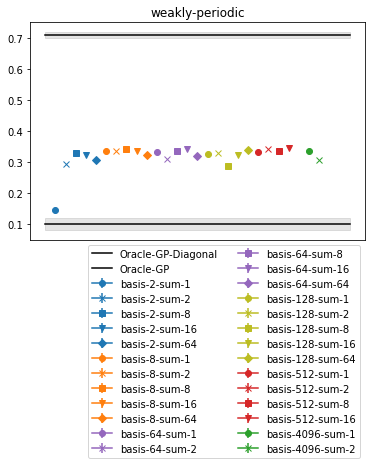

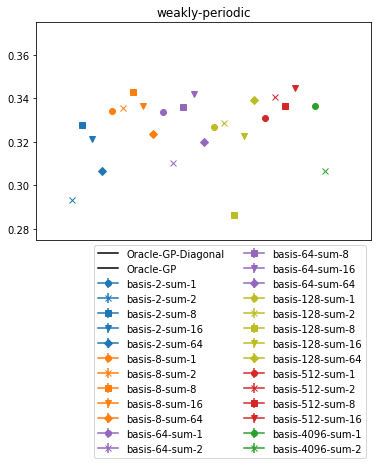

In [83]:
plot_results('weakly-periodic', df)

plot_results('weakly-periodic', df, True)
